In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
import matplotlib as mpl
import warnings
import glob

warnings.filterwarnings('ignore')
mpl.rcParams['savefig.dpi'] = 128
mpl.rcParams['figure.dpi'] = 128
# Plot size to 14" x 7"
mpl.rc('figure', figsize = (14, 7))
# Font size to 14
mpl.rc('font', size = 14)
# Do not display top and right frame lines
mpl.rc('axes.spines', top = False, right = False)
# Remove grid lines
mpl.rc('axes', grid = False)
# Set backgound color to white
mpl.rc('axes', facecolor = 'white')


# df_fleats = pd.read_csv('data/marketing-breakdown-detailed.csv')
# df_fleats = df_fleats.append(pd.read_csv('data/marketing-breakdown-detailed (2).csv'))
# df_fleats = df_fleats.append(pd.read_csv('data/marketing-breakdown-detailed (3).csv'))
# df_fleats = df_fleats.append(pd.read_csv('data/marketing-breakdown-detailed (4).csv'))
# read whole year data
allFiles = glob.glob("data/*.csv")
df_fleats = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0,parse_dates=False)
    list_.append(df)
df_fleats = pd.concat(list_)

In [2]:
selected_features = ['Marketing Code','Suburb', 'State','Post Code','Classification','Enquired',
                     'Loan Amount','loan_reason','property_use']
target = 'Enquiry Status';
whole_set = selected_features + [target]

df = df_fleats[whole_set]
df = df.replace('On Hold','Rejected')
# convert loan amount to number type, and change string to NaN
df['Loan Amount'] = pd.to_numeric(df['Loan Amount'],errors='coerce')
df = df.dropna(axis=0, how='any')
df = df[~df[target].isin(['In Progress','Just Received'])]

In [3]:
df['Enquired'] = pd.DatetimeIndex(df['Enquired'])
df['Loan Amount'] = df['Loan Amount'].astype(int)
df['Post Code'] = df['Post Code'].astype(int)

In [4]:
from datetime import datetime
from dateutil.parser import parse

# filter years
start_date = '2017-01-01' 
end_date = '2017-12-31'
mask = (df['Enquired'] > start_date) & (df['Enquired'] <= end_date)
df = df.loc[mask].reset_index(drop=True)

# remove Year feature since it is not important (show below random forest)
# df['Year'] = df['Enquired'].dt.year
df['Month'] = df['Enquired'].dt.month
df['Day'] = df['Enquired'].dt.day
df['Hour'] = df['Enquired'].dt.hour
df['Weekday'] = df['Enquired'].dt.weekday_name

df = df.loc[:,df.columns != 'Enquired']

In [5]:
df.groupby(target).mean()

,Post Code,Loan Amount,Month,Day,Hour
Enquiry Status,,,,,
Accepted,3296.861823,459434.523735,5.217963,15.230444,14.235569
Rejected,3460.598461,430872.872508,5.254643,16.257561,14.078943


In [6]:
df.groupby(target).describe()

Day                                                   \
                  count       mean       std  min  25%   50%   75%   max   
Enquiry Status                                                             
Accepted         4487.0  15.230444  9.076454  1.0  7.0  15.0  23.0  31.0   
Rejected        26386.0  16.257561  9.273916  1.0  8.0  17.0  25.0  31.0   

                   Hour              ...   Month       Post Code               \
                  count       mean   ...     75%   max     count         mean   
Enquiry Status                       ...                                        
Accepted         4487.0  14.235569   ...     8.0  11.0    4487.0  3296.861823   
Rejected        26386.0  14.078943   ...     7.0  12.0   26386.0  3460.598461   

                                                                    
                        std    min     25%     50%     75%     max  
Enquiry Status                                                      
Accepted        1256.811963  800.0  2259.0  3004.0  4074.5  7325.0  
Rejected        1354.994878    0.0  2324.0  3064.0  4215.0  7470.0  

[2 rows x 40 columns]

In [7]:
# import random
# import matplotlib.dates as mdates
# import matplotlib.mlab as mlab

# # generate some random data (approximately over 5 years)
# data_1 = df[['Enquiry Status','Day']]
# data_2 = df[['Enquiry Status','Hour']]

# plot_date = data_1.groupby(['Day', 'Enquiry Status']).size().reset_index(name="counts")
# plot_date = plot_date.loc[plot_date['Enquiry Status'] == 'Accepted']

# plot_time = data_2.groupby(['Hour', 'Enquiry Status']).size().reset_index(name="counts")
# plot_time = plot_time.loc[plot_time['Enquiry Status'] == 'Accepted']

# plt.xlabel('Accpetances by hour')
# plt.ylabel('Acceptances')
# plt.plot(plot_time['Hour'], plot_time['counts'])

# plt.title('Accpeted counts by Hour')
# plt.bar(range(plot_time['Hour'].shape[0]), plot_time['counts'])
# plt.xticks(range(plot_time['Hour'].shape[0]),plot_time['Hour'].values)
# # plt.xticks(rotation=90)
# plt.show()

In [8]:
# import calendar

# plt_accepted = df.loc[df['Enquiry Status'] == 'Accepted']

# # get and sort acceptances by day
# count_day_accepted = plt_accepted.groupby(['Weekday']).size().reset_index(name="counts")
# weekdays = list(calendar.day_name)
# mapping = {day: i for i, day in enumerate(weekdays)}
# key = count_day_accepted['Weekday'].map(mapping)
# count_day_accepted = count_day_accepted.iloc[key.argsort()].reset_index(drop=True)


# plt_rejected = df.loc[df['Enquiry Status'] == 'Rejected']

# count_day_rejected = plt_rejected.groupby(['Weekday']).size().reset_index(name="counts")
# weekdays = list(calendar.day_name)
# mapping = {day: i for i, day in enumerate(weekdays)}
# key = count_day_rejected['Weekday'].map(mapping)
# count_day_rejected = count_day_rejected.iloc[key.argsort()].reset_index(drop=True)



# plt_X1 = plt_accepted[['Loan Amount','Weekday']]
# plt_y1 = plt_accepted[['Enquiry Status']]

# # ax = count_day.plot()
# # ax.set_xlabel("Day")
# # plt.plot_date(x=count_day['day_of_week'], y=count_day['counts'],fmt="r-")
# # plt.plot_date(x=count_date['Enquired Date'], y=count_date['counts'],fmt="r-")

# # plt.plot(count_day_accepted['day_of_week'], count_day_accepted['counts'])
# # plt.xticks(rotation=45)
# # plt.show()

# # print(count_day_accepted['day_of_week'].shape[0])
# plt.title('Accpeted counts by day')
# plt.bar(range(count_day_accepted['Weekday'].shape[0]), count_day_accepted['counts'])
# plt.xticks(range(count_day_accepted['Weekday'].shape[0]),count_day_accepted['Weekday'].values, rotation=45)
# plt.show()

# plt.title('Rejected counts by day')
# plt.bar(range(count_day_rejected['Weekday'].shape[0]), count_day_rejected['counts'])
# plt.xticks(range(count_day_rejected['Weekday'].shape[0]),count_day_rejected['Weekday'].values, rotation=45)
# plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

le = LabelEncoder()
class MultiColumnLabelEncoder:
    def __init__(self, columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self, X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = le.fit_transform(output[col])
#                 output[col] = OneHotEncoder().fit_transform(output[col])
        else:
            for colname, col in output.iteritems():
                output[colname] = le.fit_transform(col)
#                 output[colname] = OneHotEncoder().fit_transform(col)
        return output
       

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [10]:
print("List of data types: \n{}".format(df.dtypes))

encoded_columns = list(df.select_dtypes(include=['category','object']))

print("selected encoded_columns: \n{}".format(encoded_columns))

df = MultiColumnLabelEncoder(columns = encoded_columns).fit_transform(df)

List of data types: 
Marketing Code    object
Suburb            object
State             object
Post Code          int64
Classification    object
Loan Amount        int64
loan_reason       object
property_use      object
Enquiry Status    object
Month              int64
Day                int64
Hour               int64
Weekday           object
dtype: object
selected encoded_columns: 
['Marketing Code', 'Suburb', 'State', 'Classification', 'loan_reason', 'property_use', 'Enquiry Status', 'Weekday']


In [11]:
df.describe()

,Marketing Code,Suburb,State,Post Code,Classification,Loan Amount,loan_reason,property_use,Enquiry Status,Month,Day,Hour,Weekday
count,30873.000000,30873.000000,30873.000000,30873.000000,30873.000000,3.087300e+04,30873.000000,30873.000000,30873.000000,30873.000000,30873.000000,30873.000000,30873.000000
mean,126.319826,2466.381142,3.155605,3436.801412,8.730153,4.350239e+05,4.531079,2.525994,0.854663,5.249312,16.108282,14.101707,3.073592
std,67.025579,1423.338475,2.351253,1342.393179,7.571771,4.952107e+05,4.575149,1.140030,0.352446,3.006935,9.252419,5.546940,1.971131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,65.000000,1185.000000,1.000000,2320.000000,2.000000,2.425000e+05,0.000000,3.000000,1.000000,3.000000,8.000000,10.000000,1.000000
50%,136.000000,2470.000000,3.000000,3048.000000,6.000000,3.700000e+05,4.000000,3.000000,1.000000,4.000000,16.000000,14.000000,3.000000
75%,170.000000,3701.000000,6.000000,4211.000000,15.000000,5.200000e+05,4.000000,3.000000,1.000000,7.000000,25.000000,19.000000,5.000000
max,265.000000,4949.000000,7.000000,7470.000000,31.000000,1.000000e+07,15.000000,6.000000,1.000000,12.000000,31.000000,23.000000,6.000000


In [12]:
df.corr()

,Marketing Code,Suburb,State,Post Code,Classification,Loan Amount,loan_reason,property_use,Enquiry Status,Month,Day,Hour,Weekday
Marketing Code,1.000000,-0.022538,-0.091823,-0.083448,0.035531,0.035147,-0.375581,-0.050124,0.006432,-0.285912,0.019104,0.103831,-0.029664
Suburb,-0.022538,1.000000,0.052229,0.021692,-0.022546,0.007656,0.029941,0.001996,-0.000582,-0.004614,0.001972,0.000747,-0.012053
State,-0.091823,0.052229,1.000000,0.637206,0.099899,-0.085981,0.109123,0.053100,0.044685,0.061848,-0.000381,-0.011349,-0.003058
Post Code,-0.083448,0.021692,0.637206,1.000000,0.062589,-0.137025,0.113393,0.067776,0.042989,0.048382,0.004042,-0.015954,-0.006907
Classification,0.035531,-0.022546,0.099899,0.062589,1.000000,-0.026253,-0.104352,-0.011741,-0.054582,-0.068793,0.015031,0.033056,0.007095
Loan Amount,0.035147,0.007656,-0.085981,-0.137025,-0.026253,1.000000,-0.064874,0.010686,-0.020328,-0.009475,0.007995,0.013546,-0.008323
loan_reason,-0.375581,0.029941,0.109123,0.113393,-0.104352,-0.064874,1.000000,0.186811,-0.078404,0.189786,-0.008585,-0.056412,0.005935
property_use,-0.050124,0.001996,0.053100,0.067776,-0.011741,0.010686,0.186811,1.000000,0.006944,0.008584,0.007086,0.012152,-0.005853
Enquiry Status,0.006432,-0.000582,0.044685,0.042989,-0.054582,-0.020328,-0.078404,0.006944,1.000000,0.004299,0.039125,-0.009952,-0.020319
Month,-0.285912,-0.004614,0.061848,0.048382,-0.068793,-0.009475,0.189786,0.008584,0.004299,1.000000,0.030296,-0.074588,0.018426


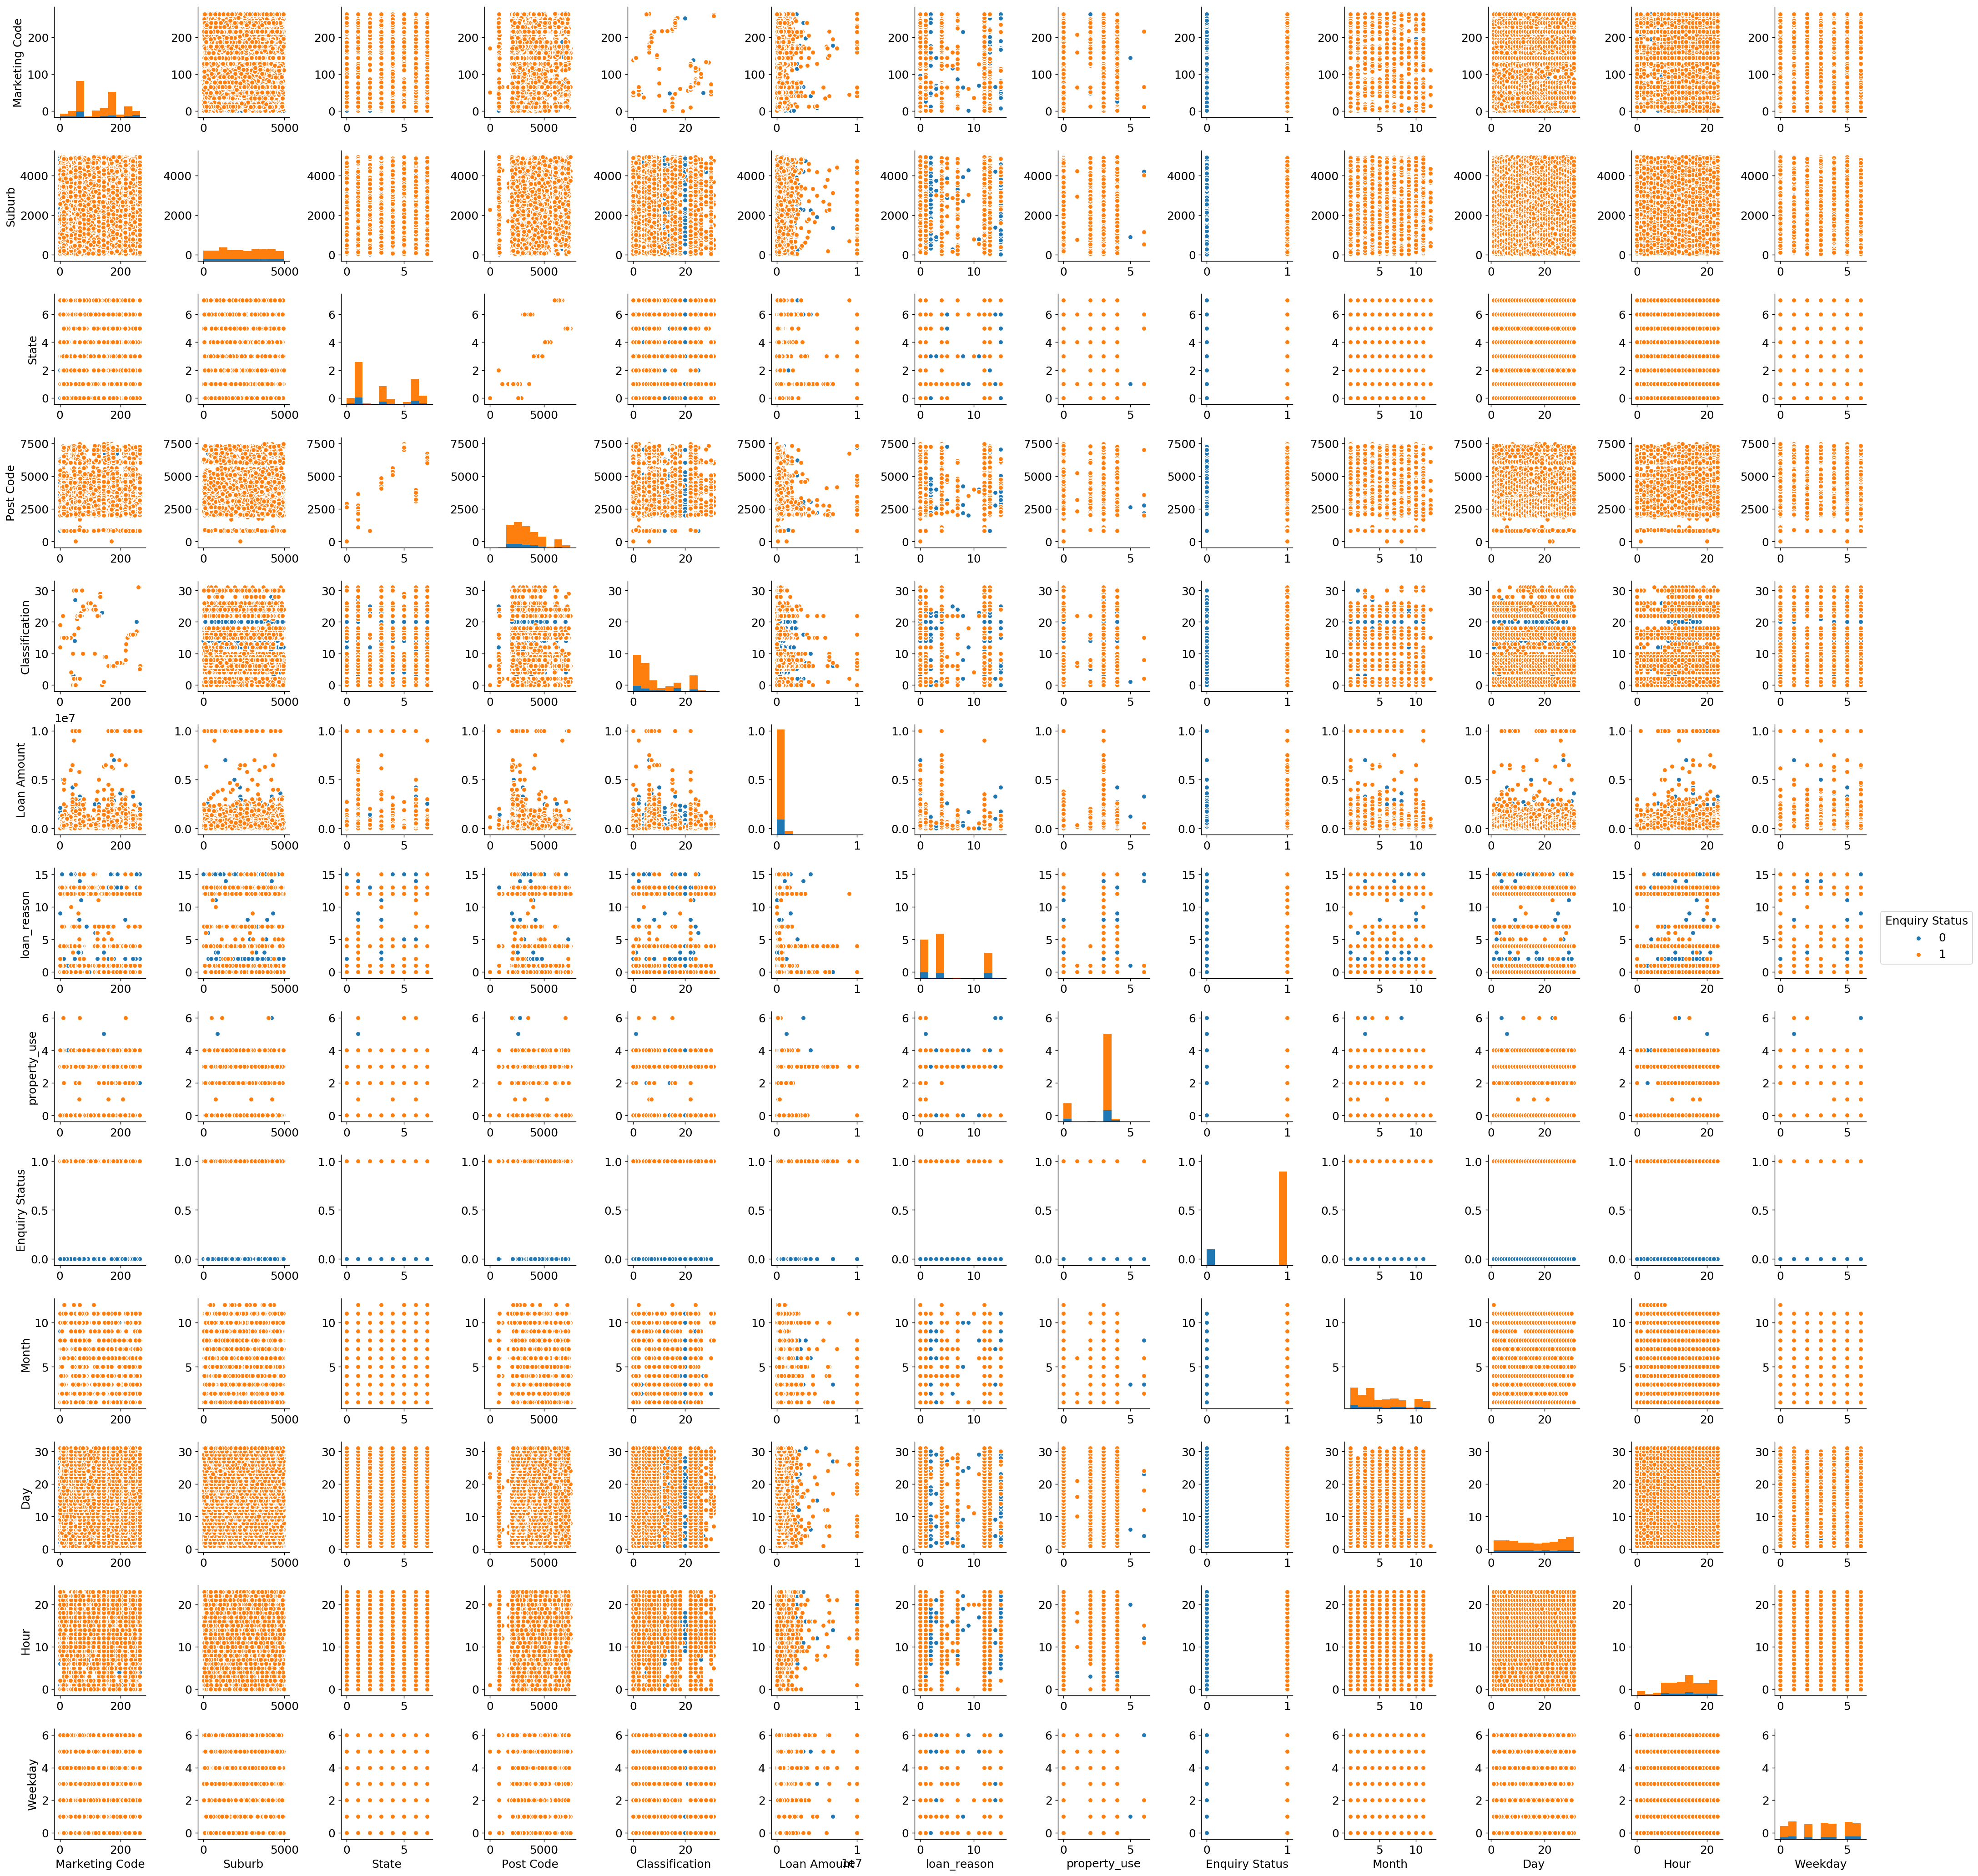

In [13]:
# import seaborn as sns
# sns.pairplot(df, hue="Enquiry Status")

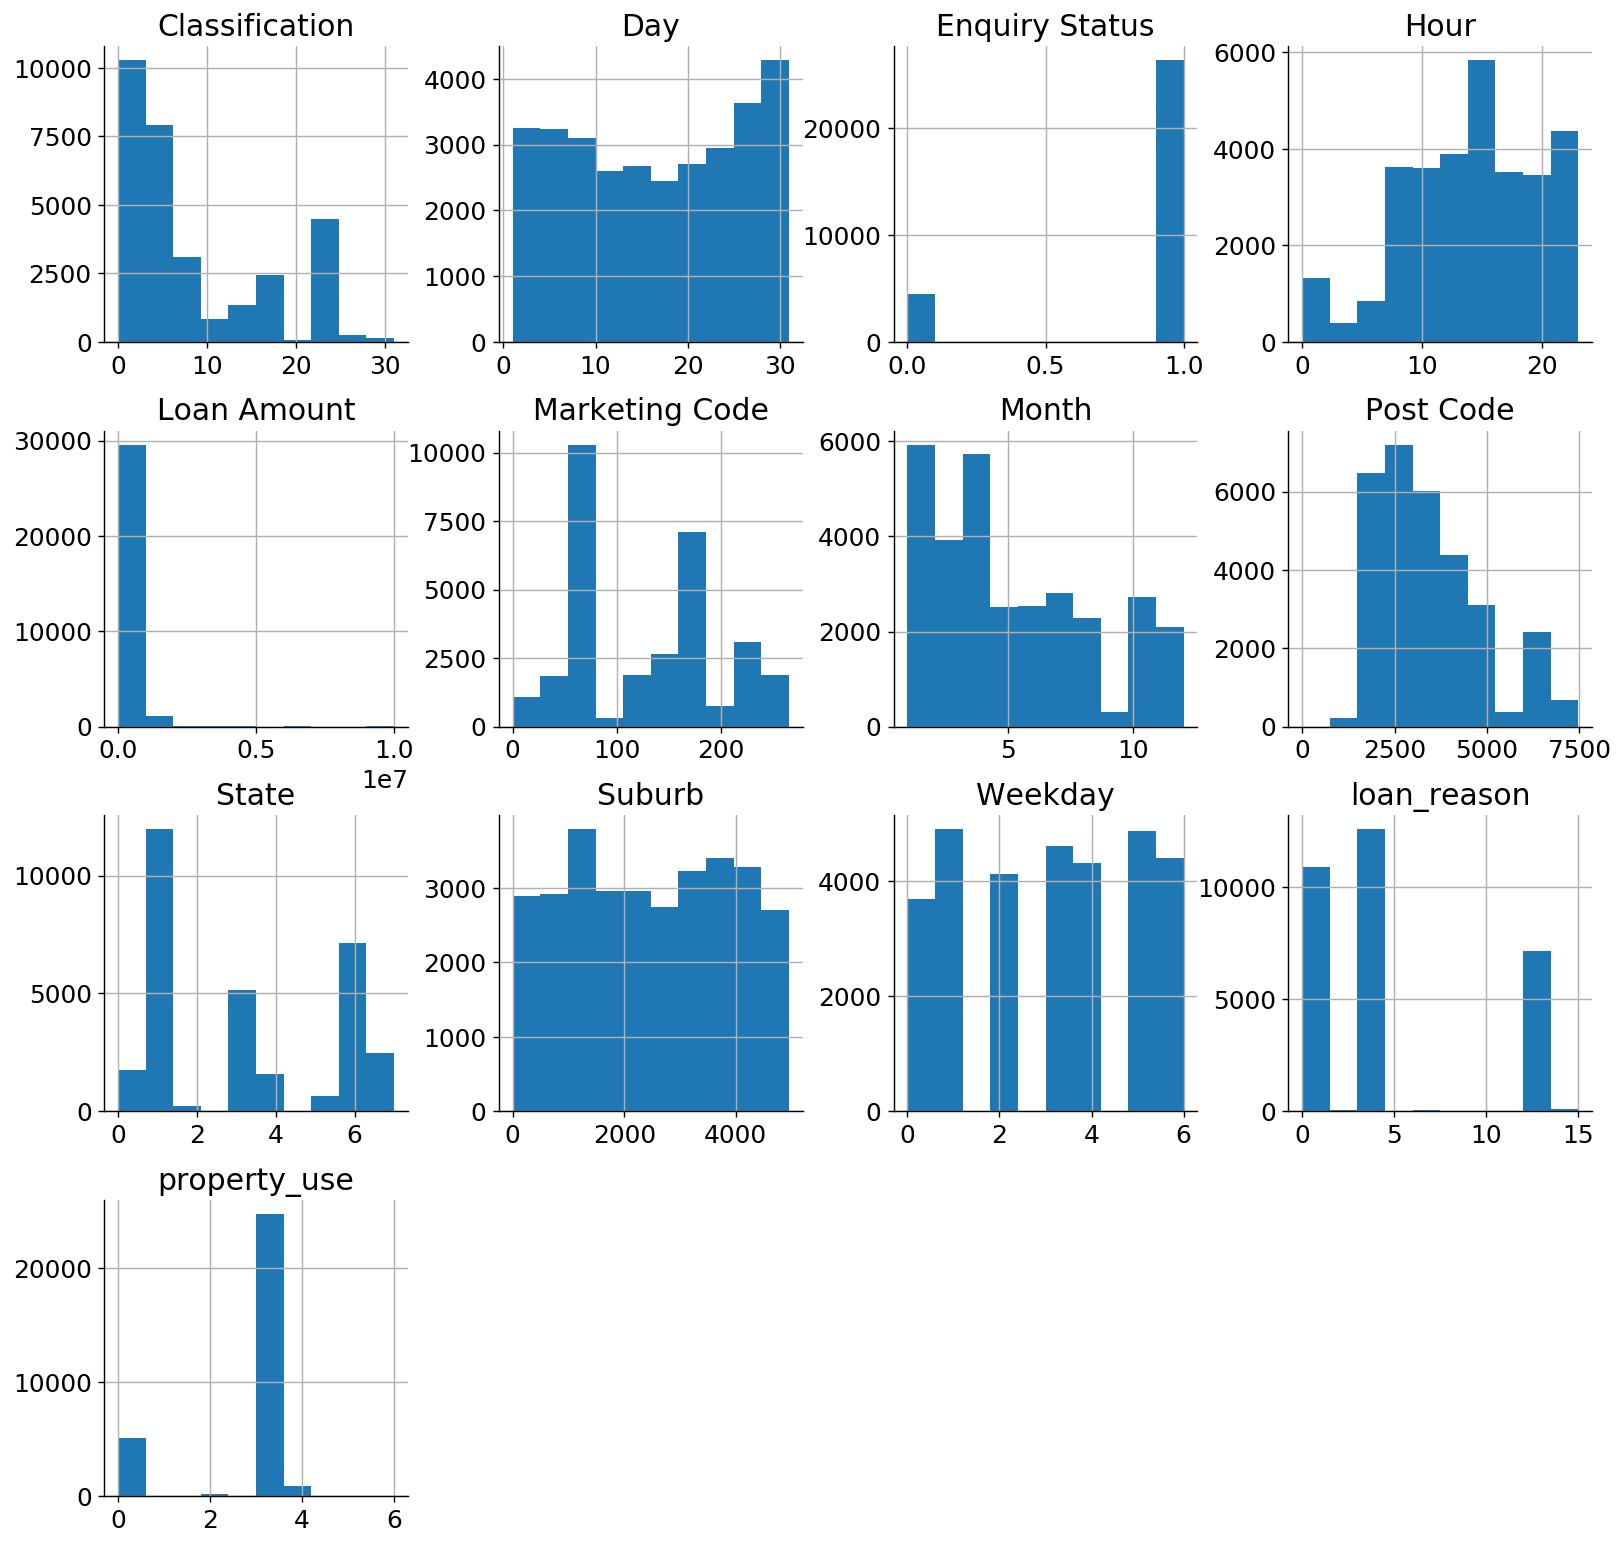

In [14]:
pd.DataFrame.hist(df, figsize = [15,15]);

In [15]:
# X = df[['Marketing Code','App Source', 'Web Source', 'Classification','Enquired Date',]]
X = df[df.keys()]
X = df.loc[:,df.columns != target]
y = df[target]

In [16]:
print("Keys of enquiries_dataset: \n{}".format(X.keys()))

Keys of enquiries_dataset: 
Index(['Marketing Code', 'Suburb', 'State', 'Post Code', 'Classification',
       'Loan Amount', 'loan_reason', 'property_use', 'Month', 'Day', 'Hour',
       'Weekday'],
      dtype='object')


In [17]:
print("Shape of X: {}".format(X.shape))
print("Shape of y: {}".format(y.shape))

Shape of X: (30873, 12)
Shape of y: (30873,)


In [18]:
# feature selection
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
selected_X = model.transform(X)

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                     test_size=0.3,
                     random_state=0,
                     stratify=y)
# rescale data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_std, y_train)

print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))
print(lr.intercept_)
print(lr.coef_)

Training accuracy: 0.854657350423
Test accuracy: 0.854675016195
[ 1.81209149]
[[-0.06373158  0.          0.11318282  0.07244083 -0.17336953 -0.04273816
  -0.29236989  0.06311206  0.02309402  0.11349195 -0.03253043 -0.03935375]]


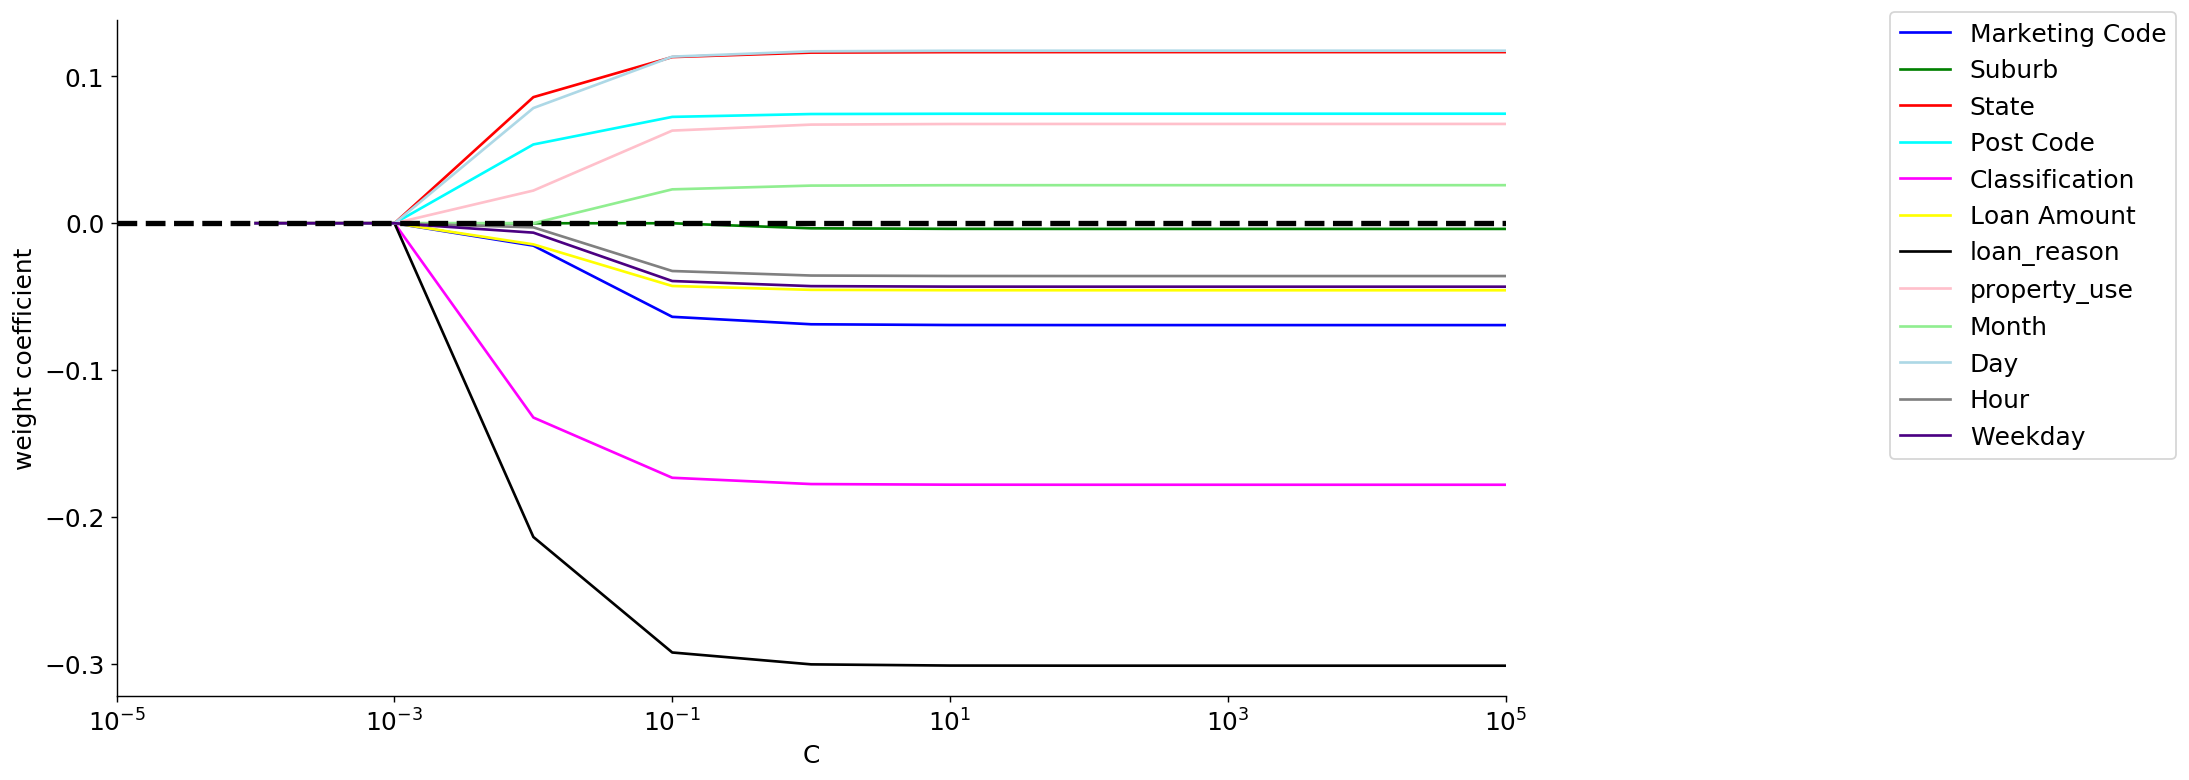

In [21]:
fig = plt.figure()
ax = plt.subplot(111)

colors = ['blue', 'green', 'red', 'cyan','magenta', 'yellow', 'black','pink', 'lightgreen', 'lightblue',
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10. ** c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[0])
    params.append(10 ** c)
    
weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=X.columns[column],
             color=color)
    
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

Test score: 0.86


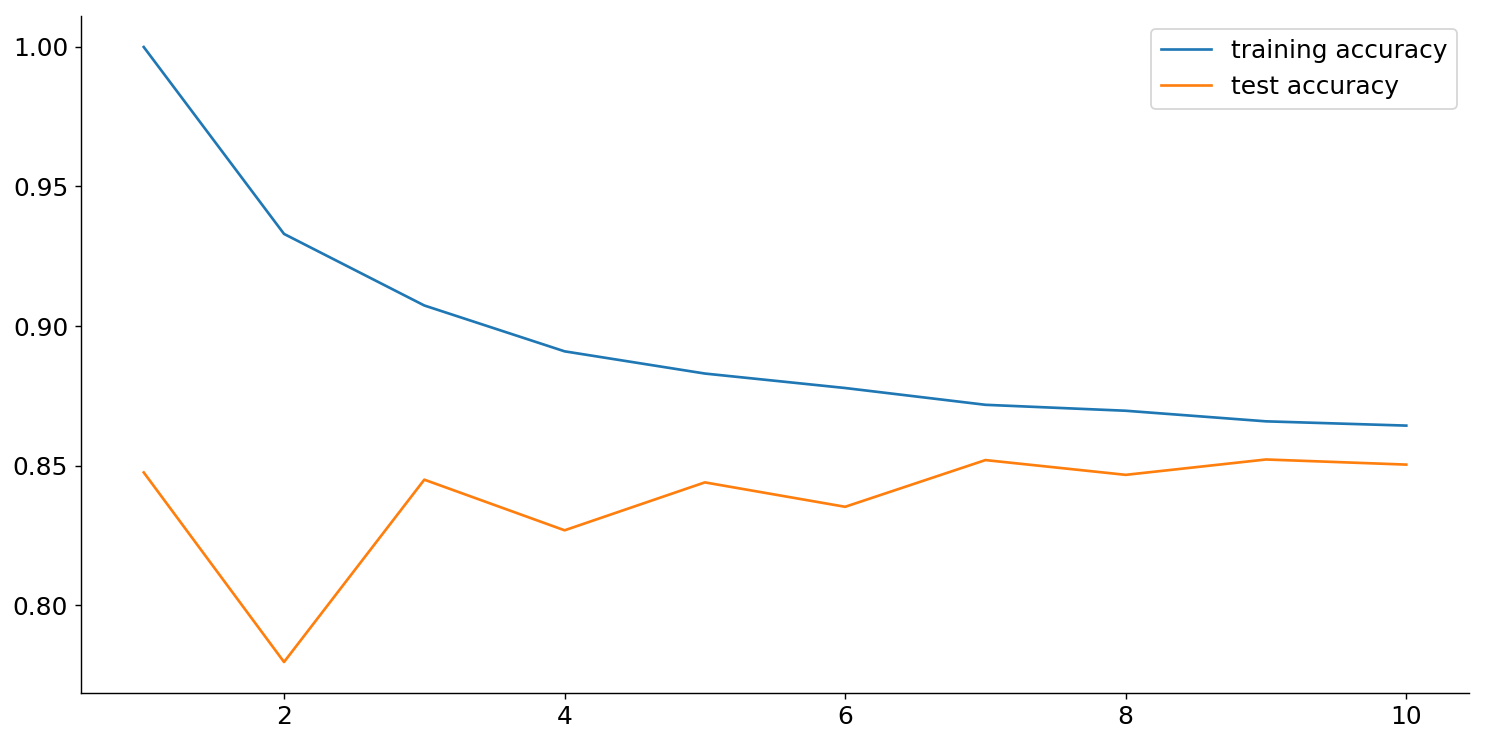

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_std, y_train)
pred_kn = knn.predict(X_test)
print("Test score: {:.2f}".format(knn.score(X_test_std, y_test)))


training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10.
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.legend()

In [23]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss="hinge", penalty="l2")
sgd.fit(X_train_std, y_train)
pred_sgd = sgd.predict(X_test)
print("Test score: {:.2f}".format(sgd.score(X_test_std, y_test)))

Test score: 0.85


In [24]:
from sklearn import svm
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import cross_val_score

svc = svm.SVC(probability=True)
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
print("Test score: {:.2f}".format(svc.score(X_test, y_test)))

scores = cross_val_score(clf, X, y, cv=5)

# N = range(1, 16)
# for n in N:
#     pca = KernelPCA(n_components=n)
#     X_n_kept = pca.fit_transform(X_test_std)
#     # Estimate accuracy on the data set with top n components
#     classifier = svm.SVC(gamma=0.001)
#     score_n_components = cross_val_score(classifier, X_n_kept, y_test).mean()
#     print('Score with the data set of top {0} components: {1:.2f}'.format(n, score_n_components))

Test score: 0.89


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics

rfc = RandomForestClassifier(n_estimators=10,
                            random_state=1)
rfc.fit(X_train_std, y_train)
pred_forest = rfc.predict(X_test)

print("Test score: {:.2f}".format(rfc.score(X_test_std, y_test)))

scores = cross_val_score(rfc, X_test_std, y_test)

Test score: 0.91


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline


lr = LogisticRegression()
lr = lr.fit(X_train_std, y_train)
pred_lr = lr.predict(X_test)

print("X_test_std {}".format(X_test_std.shape))
N = range(1, 16)
for n in N:
    pca = KernelPCA(n_components=n)
    X_n_kept = pca.fit_transform(X_test_std)
    print("X_n_kept {}".format(X_n_kept.shape))
    # Estimate accuracy on the data set with top n components
    classifier = LogisticRegression()
    score_n_components = cross_val_score(classifier, X_n_kept, y_test).mean()
    print('Score with the data set of top {0} components: {1:.2f}'.format(n, score_n_components))

X_test_std (9262, 12)
X_n_kept (9262, 1)
Score with the data set of top 1 components: 0.85
X_n_kept (9262, 2)
Score with the data set of top 2 components: 0.85
X_n_kept (9262, 3)
Score with the data set of top 3 components: 0.85
X_n_kept (9262, 4)
Score with the data set of top 4 components: 0.85
X_n_kept (9262, 5)
Score with the data set of top 5 components: 0.85
X_n_kept (9262, 6)
Score with the data set of top 6 components: 0.85
X_n_kept (9262, 7)
Score with the data set of top 7 components: 0.85
X_n_kept (9262, 8)
Score with the data set of top 8 components: 0.85
X_n_kept (9262, 9)
Score with the data set of top 9 components: 0.85
X_n_kept (9262, 10)
Score with the data set of top 10 components: 0.85
X_n_kept (9262, 11)
Score with the data set of top 11 components: 0.85
X_n_kept (9262, 12)
Score with the data set of top 12 components: 0.85
X_n_kept (9262, 13)
Score with the data set of top 13 components: 0.85
X_n_kept (9262, 14)
Score with the data set of top 14 components: 0.85
X_

 1) Suburb                         0.132753
 2) Loan Amount                    0.127450
 3) Post Code                      0.119799
 4) Marketing Code                 0.118942
 5) loan_reason                    0.095227
 6) Day                            0.087936
 7) Hour                           0.081972
 8) Classification                 0.061173
 9) Month                          0.059881
10) Weekday                        0.054362
11) property_use                   0.032205
12) State                          0.028301


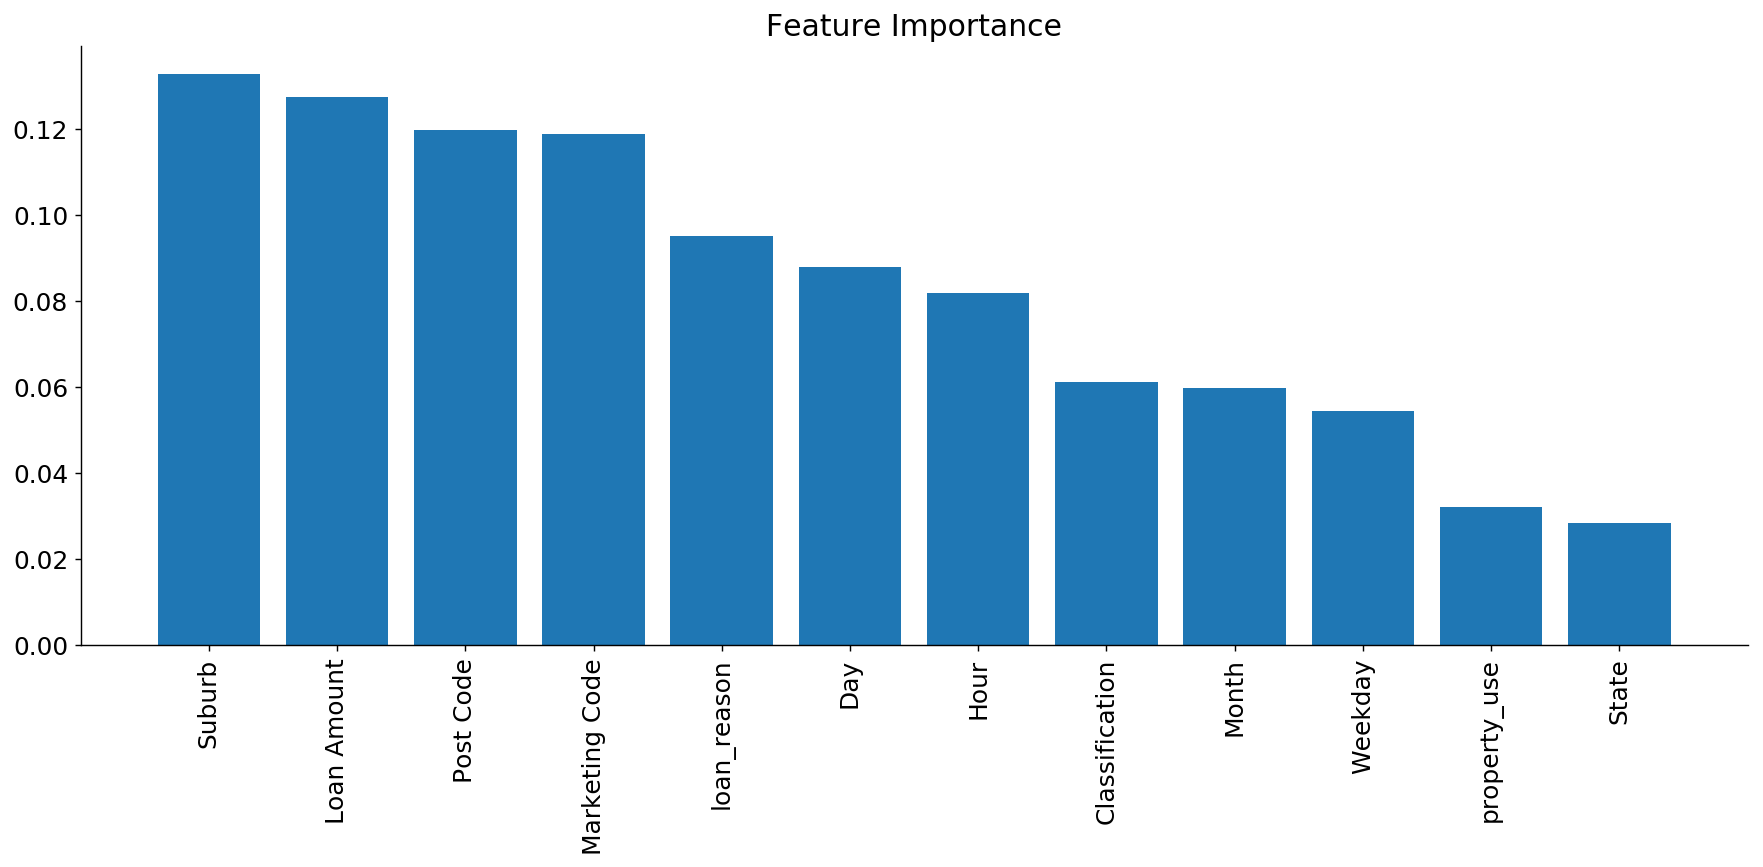

In [27]:
feat_labels = X.columns[:]
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
    
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),importances[indices],align='center')
plt.xticks(range(X_train.shape[1]),feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [28]:
# from matplotlib.ticker import FuncFormatter
# def millions(x, pos):
#     'The two args are the value and tick position'
#     return '$%1.1fM' % (x*1e-6)

# formatter = FuncFormatter(millions)

# count_amount_accepted = plt_accepted.groupby(['Loan Amount']).size().reset_index(name="counts")
# count_amount_rejected = plt_rejected.groupby(['Loan Amount']).size().reset_index(name="counts")

# # count_amount_accepted.to_csv('test.csv')
# # display(count_amount_accepted)
# fig, ax = plt.subplots()
# plt.plot(count_amount_accepted['Loan Amount'], count_amount_accepted['counts'])
# plt.xticks(rotation=45)
# ax.xaxis.set_major_formatter(formatter)
# plt.show()

In [29]:
from sklearn import cross_validation
from sklearn.metrics import classification_report


scores = cross_validation.cross_val_score(lr, X, y, cv=5)
print("LogisticRegression cross_validation: {:.2f}".format(np.mean(scores, axis=0)))

scores = cross_validation.cross_val_score(knn, X, y, cv=5)
print("KNeighborsClassifier cross_validation: {:.2f}".format(np.mean(scores, axis=0)))

scores = cross_validation.cross_val_score(sgd, X, y, cv=5)
print("SGDClassifier cross_validation: {:.2f}".format(np.mean(scores, axis=0)))

scores = cross_validation.cross_val_score(svc, X, y, cv=5)
print("SVC cross_validation: {:.2f}".format(np.mean(scores, axis=0)))

scores = cross_validation.cross_val_score(rfc, X, y, cv=5)
print("RandomForestClassifier cross_validation: {:.2f}".format(np.mean(scores, axis=0)))

print()


print("LogisticRegression")
print(classification_report(y_test, pred_lr))

print("KNeighborsClassifier")
print(classification_report(y_test, pred_kn))

print("SGDClassifier")
print(classification_report(y_test, pred_sgd))

print("SVC")
print(classification_report(y_test, pred_svc))

print("RandomForestClassifier")
print(classification_report(y_test, pred_forest))

/Users/mluo/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


LogisticRegression cross_validation: 0.85
KNeighborsClassifier cross_validation: 0.85
SGDClassifier cross_validation: 0.80
SVC cross_validation: 0.89
RandomForestClassifier cross_validation: 0.87

LogisticRegression
             precision    recall  f1-score   support

          0       0.15      1.00      0.26      1346
          1       1.00      0.03      0.06      7916

avg / total       0.87      0.17      0.09      9262

KNeighborsClassifier
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1346
          1       0.85      1.00      0.92      7916

avg / total       0.73      0.85      0.79      9262

SGDClassifier
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1346
          1       0.85      1.00      0.92      7916

avg / total       0.73      0.85      0.79      9262

SVC
             precision    recall  f1-score   support

          0       1.00      0.26      0.41    

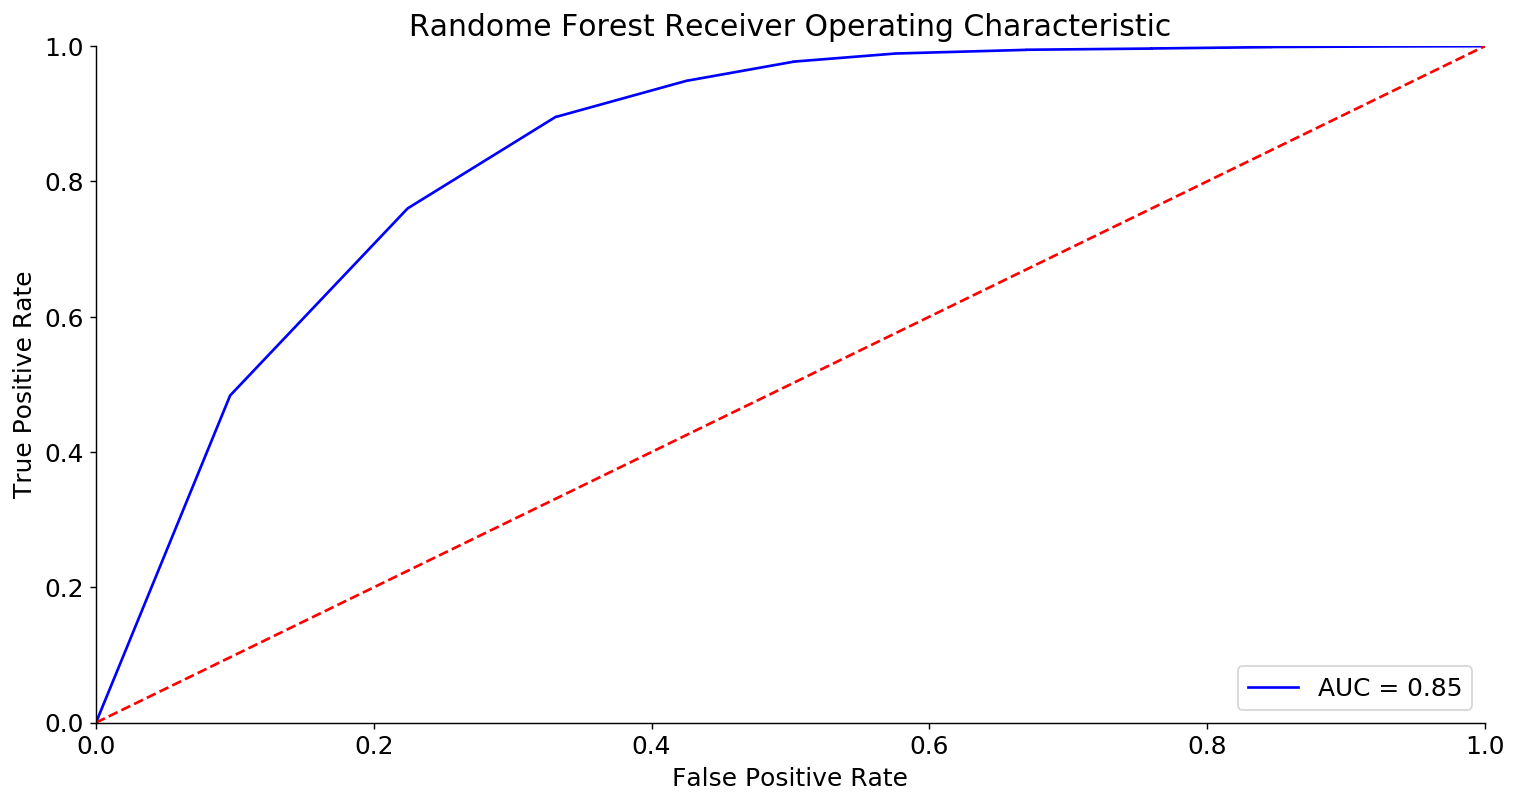

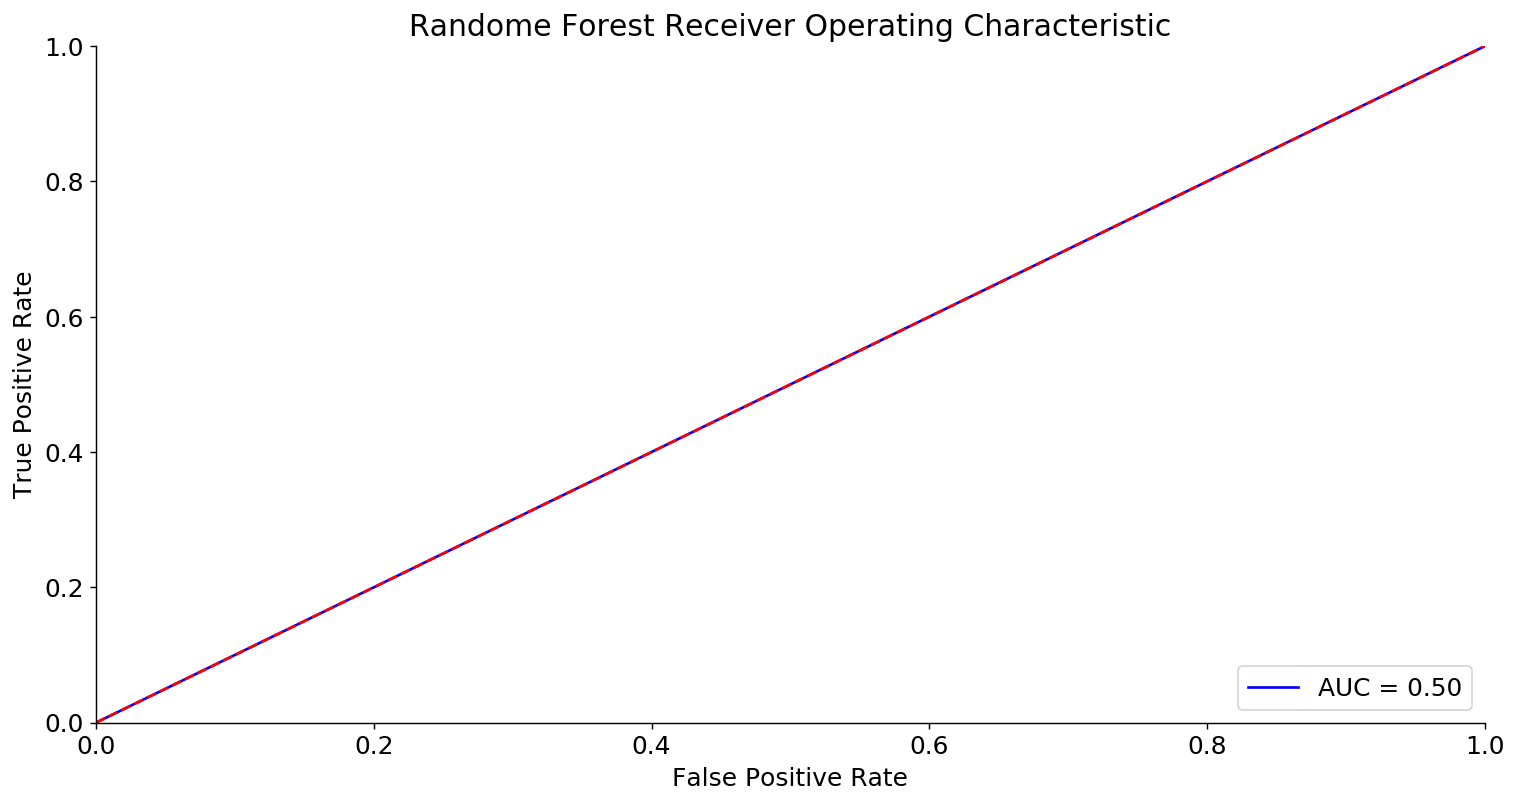

In [30]:
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc

probs = rfc.predict_proba(X_test_std)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Randome Forest Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


probs = svc.predict_proba(X_test_std)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Randome Forest Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [31]:
# input_x = X.iloc[:]
# input_x_test = X.iloc[:,idxs_selected]
# # input_x = input_x.iloc[0,idxs_selected]

# # input_x = input_x.drop('Enquiry Status', 1)

# input_x_test = MultiColumnLabelEncoder(columns = input_x_test.keys()).fit_transform(input_x_test)
# input_x_test = scaler.fit_transform(input_x_test)

# # for row in input_x:
# #     result = rfc.predict(row)[0]
# #     proba = np.max(rfc.predict_proba(row))    

# #     print('reuslt: {}'.format(le.inverse_transform(result)))
# #     print('probability: {0}%'.format(proba))
# #     print()

# # result = rfc.predict(input_x)[0]
# # proba = np.max(rfc.predict_proba(input_x))    

# # print('reuslt: {}'.format(le.inverse_transform(result)))
# # print('probability: {0}%'.format(proba))
# result = rfc.predict(input_x_test)
# result = le.inverse_transform(result)
# proba = rfc.predict_proba(input_x_test)   
# proba = [np.max(p) for p in proba]
# input_x.to_csv('example.csv')

In [32]:
# input_x = input_x.assign(predict=result.tolist())
# input_x = input_x.assign(possibility=proba)
# input_x.head()
# input_x.to_csv('result/v1.csv')

In [33]:
a = '[{"col 1":"a","col 2":"b"},{"col 1":"c","col 2":"d"}]'

In [34]:
# pd.read_json(a, orient='records')
# import json
# test_json = json.dumps(a)
test = pd.read_json(a, orient='records')
test

,col 1,col 2
0,a,b
1,c,d
